# Predicting Online Shopper Intent
#### LOGISTIC REGRESSION IMPLEMENTATION
##### Implemented by Jeremia Adriano

In [1]:
import numpy as np
import pandas as pd
from  numpy import *
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Background

This project involves predicting something that is somewhat of a “holy grail” of business intelligence: trying to predict whether or not a customer will eventually make a purchase using while using an online shopping portal, based on the pattern of pages they have visited on the website, certain analytical features, the time of week and year, and other features. 

The data file we’ve been given is a selection of a much larger data set: it consists of 3816 data examples and 17 features; the output variable is the last (18th) column of the file labelled “Revenue” and represents whether or not a customer eventually made a purchase (0 – purchase made  / 1 – purchase not made).

### What is a Logistic Regression?

Logistic regression is a type of regression analysis.

![logisticregression.png](img/logisticregression.png)



Regression analysis is a type of predictive modeling technique which is used to find the relationship between a dependent variable (usually known as the “Y” variable) and either one independent variable (the “X” variable) or a series of independent features. When two or more independent features are used to predict or explain the outcome of the dependent variable, this is known as multiple regression.  And in this implementation, the outcomes are "purchase made" or "purchase not made".

### Reading in the Data

We will begin with Importting our Training data whcih will be used to train our SVM, and perform predictions on the developed SVM using the Cross-Vaidation data set. 

In [3]:
#Load and print Training Data
data_train = loadtxt('data/train.dat')
column_labels = ['','# Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser Region', 'TrafficType', 'VisitorType', 'Weekend','Revenue']

print("\nTraining data: "+(str)(len(data_train)))
display(pd.DataFrame(data_train,columns = column_labels).head(10))

#Load and print Cross-validation Data
data_cv = loadtxt('data/cv.dat')
print("\nCV data: "+(str)(len(data_cv)))
display(pd.DataFrame(data_cv,columns = column_labels).head(10))


Training data: 2289


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,2.0,162.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,1.0,4.0,2.0,0.0,0.0
1,2.0,256.0,0.0,0.0,10.0,117.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,7.0,11.0,2.0,1.0,1.0
2,0.0,0.0,0.0,0.0,6.0,31.0,0.0,0.0,0.0,0.0,10.0,2.0,5.0,1.0,1.0,2.0,0.0,0.0
3,8.0,131.0,1.0,4.0,95.0,2107.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,4.0,2.0,1.0,0.0
4,2.0,8.0,1.0,14.0,14.0,603.0,0.0,0.0,44.0,0.0,3.0,2.0,2.0,1.0,7.0,2.0,0.0,1.0
5,1.0,18.0,0.0,0.0,62.0,1288.0,0.0,0.0,13.0,0.0,11.0,2.0,10.0,1.0,3.0,2.0,0.0,1.0
6,4.0,81.0,0.0,0.0,12.0,223.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0,0.0
7,16.0,485.0,2.0,19.0,42.0,753.0,0.0,0.0,31.0,0.0,11.0,2.0,2.0,1.0,8.0,2.0,0.0,1.0
8,5.0,1417.0,0.0,0.0,36.0,1051.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0,2.0,1.0,0.0
9,3.0,371.0,5.0,106.0,85.0,2128.0,0.0,0.0,43.0,0.0,11.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0



CV data: 763


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend,Revenue
0,1.0,112.0,0.0,0.0,8.0,543.0,0.0,0.0,28.0,0.0,10.0,1.0,1.0,6.0,2.0,0.0,1.0,1.0
1,2.0,28.0,0.0,0.0,12.0,224.0,0.0,0.0,44.0,0.0,3.0,3.0,2.0,6.0,2.0,2.0,0.0,1.0
2,2.0,14.0,0.0,0.0,53.0,2016.0,0.0,0.0,8.0,0.0,6.0,2.0,2.0,3.0,3.0,2.0,0.0,1.0
3,1.0,43.0,1.0,0.0,3.0,65.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,1.0,4.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,6.0,10.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,22.0,573.0,0.0,0.0,0.0,0.0,11.0,3.0,2.0,8.0,2.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,1.0,1.0,3.0,2.0,0.0,0.0
7,3.0,170.0,0.0,0.0,30.0,619.0,0.0,0.0,0.0,0.0,12.0,3.0,2.0,4.0,1.0,2.0,1.0,0.0
8,0.0,0.0,0.0,0.0,7.0,384.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,1.0,5.0,2.0,0.0,0.0
9,0.0,0.0,0.0,0.0,53.0,1121.0,0.0,0.0,24.0,0.0,7.0,2.0,4.0,9.0,1.0,2.0,0.0,1.0


### Reshape the Training data: 

In [4]:
#Set the shape of the features (m) and the shape of the classification (n)
#Notice that the final column is not a feature; it's the target variable/classification
m = data_train.shape[0]
n = data_train.shape[1]-1 


#Set X and y
#Note that the single-column matrix is reshaped to explicitly ensure that it is not a rank 1 array, where its shape is not (m,) but instead it is (m,1)
X = data_train[:,0:n]
y = data_train[:,n].reshape(m,1)

print("Features of the Training data:")
display(pd.DataFrame(X,columns = column_labels[:17]).head(10))

print("\nTarget variable of the Training data:")
display(pd.DataFrame(y).head(10))

Features of the Training data:


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,2.0,162.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,1.0,4.0,2.0,0.0
1,2.0,256.0,0.0,0.0,10.0,117.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,7.0,11.0,2.0,1.0
2,0.0,0.0,0.0,0.0,6.0,31.0,0.0,0.0,0.0,0.0,10.0,2.0,5.0,1.0,1.0,2.0,0.0
3,8.0,131.0,1.0,4.0,95.0,2107.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,4.0,2.0,1.0
4,2.0,8.0,1.0,14.0,14.0,603.0,0.0,0.0,44.0,0.0,3.0,2.0,2.0,1.0,7.0,2.0,0.0
5,1.0,18.0,0.0,0.0,62.0,1288.0,0.0,0.0,13.0,0.0,11.0,2.0,10.0,1.0,3.0,2.0,0.0
6,4.0,81.0,0.0,0.0,12.0,223.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0
7,16.0,485.0,2.0,19.0,42.0,753.0,0.0,0.0,31.0,0.0,11.0,2.0,2.0,1.0,8.0,2.0,0.0
8,5.0,1417.0,0.0,0.0,36.0,1051.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0,2.0,1.0
9,3.0,371.0,5.0,106.0,85.0,2128.0,0.0,0.0,43.0,0.0,11.0,1.0,1.0,1.0,2.0,2.0,0.0



Target variable of the Training data:


,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
5,1.0
6,0.0
7,1.0
8,0.0
9,1.0


### Reshape the Cross Validation data: 

In [5]:
#Set the shape of the features (m) and the shape of the classification (n)
#Notice that the final column is not a feature; it's the target variable/classification
m2 = data_cv.shape[0]
n2 = data_cv.shape[1]-1 

#Set X and y
#Note that the single-column matrix is reshaped to explicitly ensure that it is not a rank 1 array, where its shape is not (m,) but instead it is (m,1)
X_cv = data_cv[:,0:n2]
y_cv = data_cv[:,n2].reshape(m2,1)



print("Features of Cross Validation data:")
display(pd.DataFrame(X_cv,columns = column_labels[:17]).head(10))

print("\nTarget variable of the Cross Validation data:")
display(pd.DataFrame(y_cv).head(10))



Features of Cross Validation data:


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend
0,1.0,112.0,0.0,0.0,8.0,543.0,0.0,0.0,28.0,0.0,10.0,1.0,1.0,6.0,2.0,0.0,1.0
1,2.0,28.0,0.0,0.0,12.0,224.0,0.0,0.0,44.0,0.0,3.0,3.0,2.0,6.0,2.0,2.0,0.0
2,2.0,14.0,0.0,0.0,53.0,2016.0,0.0,0.0,8.0,0.0,6.0,2.0,2.0,3.0,3.0,2.0,0.0
3,1.0,43.0,1.0,0.0,3.0,65.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,1.0,4.0,2.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,6.0,10.0,2.0,0.0
5,0.0,0.0,0.0,0.0,22.0,573.0,0.0,0.0,0.0,0.0,11.0,3.0,2.0,8.0,2.0,0.0,0.0
6,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,1.0,1.0,3.0,2.0,0.0
7,3.0,170.0,0.0,0.0,30.0,619.0,0.0,0.0,0.0,0.0,12.0,3.0,2.0,4.0,1.0,2.0,1.0
8,0.0,0.0,0.0,0.0,7.0,384.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,1.0,5.0,2.0,0.0
9,0.0,0.0,0.0,0.0,53.0,1121.0,0.0,0.0,24.0,0.0,7.0,2.0,4.0,9.0,1.0,2.0,0.0



Target variable of the Cross Validation data:


,0
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,1.0


#### Store the respective features from the training data into arrays of their own:

In [6]:
#Each of type of feature stored in an array of their own, they include: X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15 AND X16
X1 = data_train[:,0].reshape(m,1)
X2 = data_train[:,1].reshape(m,1)
X3 = data_train[:,2].reshape(m,1)
X4 = data_train[:,3].reshape(m,1)
X5 = data_train[:,4].reshape(m,1)
X6 = data_train[:,5].reshape(m,1)
X7 = data_train[:,6].reshape(m,1)
X8 = data_train[:,7].reshape(m,1)
X9 = data_train[:,8].reshape(m,1)
X10= data_train[:,9].reshape(m,1)
X11= data_train[:,10].reshape(m,1)
X12= data_train[:,11].reshape(m,1)
X13= data_train[:,12].reshape(m,1)
X14= data_train[:,13].reshape(m,1)
X15= data_train[:,14].reshape(m,1)
X16= data_train[:,15].reshape(m,1)

#Now display X and y to make sure they look
#like they've been set correctly
print("X:")
display(pd.DataFrame(X).head(10))

print("\ny:")
display(pd.DataFrame(y).head(10))

print("\nX1:")
display(pd.DataFrame(X1).head(10))

print("\nX2:")
display(pd.DataFrame(X2).head(10))

print("\nX3:")
display(pd.DataFrame(X3).head(10))

print("\nX4:")
display(pd.DataFrame(X4).head(10))

print("\nX5:")
display(pd.DataFrame(X5).head(10))

print("\nX6:")
display(pd.DataFrame(X6).head(10))

print("\nX7:")
display(pd.DataFrame(X7).head(10))

print("\nX8:")
display(pd.DataFrame(X8).head(10))

print("\nX9:")
display(pd.DataFrame(X9).head(10))

print("\nX10:")
display(pd.DataFrame(X10).head(10))

print("\nX11:")
display(pd.DataFrame(X11).head(10))

print("\nX12:")
display(pd.DataFrame(X12).head(10))

print("\nX13:")
display(pd.DataFrame(X13).head(10))

print("\nX14:")
display(pd.DataFrame(X14).head(10))

print("\nX15:")
display(pd.DataFrame(X15).head(10))

print("\nX16:")
display(pd.DataFrame(X16).head(10))

X:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,0.0,0.0,2.0,162.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,1.0,4.0,2.0,0.0
1,2.0,256.0,0.0,0.0,10.0,117.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,7.0,11.0,2.0,1.0
2,0.0,0.0,0.0,0.0,6.0,31.0,0.0,0.0,0.0,0.0,10.0,2.0,5.0,1.0,1.0,2.0,0.0
3,8.0,131.0,1.0,4.0,95.0,2107.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,4.0,2.0,1.0
4,2.0,8.0,1.0,14.0,14.0,603.0,0.0,0.0,44.0,0.0,3.0,2.0,2.0,1.0,7.0,2.0,0.0
5,1.0,18.0,0.0,0.0,62.0,1288.0,0.0,0.0,13.0,0.0,11.0,2.0,10.0,1.0,3.0,2.0,0.0
6,4.0,81.0,0.0,0.0,12.0,223.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0
7,16.0,485.0,2.0,19.0,42.0,753.0,0.0,0.0,31.0,0.0,11.0,2.0,2.0,1.0,8.0,2.0,0.0
8,5.0,1417.0,0.0,0.0,36.0,1051.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0,2.0,1.0
9,3.0,371.0,5.0,106.0,85.0,2128.0,0.0,0.0,43.0,0.0,11.0,1.0,1.0,1.0,2.0,2.0,0.0



y:


,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
5,1.0
6,0.0
7,1.0
8,0.0
9,1.0



X1:


,0
0,0.0
1,2.0
2,0.0
3,8.0
4,2.0
5,1.0
6,4.0
7,16.0
8,5.0
9,3.0



X2:


,0
0,0.0
1,256.0
2,0.0
3,131.0
4,8.0
5,18.0
6,81.0
7,485.0
8,1417.0
9,371.0



X3:


,0
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
5,0.0
6,0.0
7,2.0
8,0.0
9,5.0



X4:


,0
0,0.0
1,0.0
2,0.0
3,4.0
4,14.0
5,0.0
6,0.0
7,19.0
8,0.0
9,106.0



X5:


,0
0,2.0
1,10.0
2,6.0
3,95.0
4,14.0
5,62.0
6,12.0
7,42.0
8,36.0
9,85.0



X6:


,0
0,162.0
1,117.0
2,31.0
3,2107.0
4,603.0
5,1288.0
6,223.0
7,753.0
8,1051.0
9,2128.0



X7:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X8:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X9:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,44.0
5,13.0
6,0.0
7,31.0
8,0.0
9,43.0



X10:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X11:


,0
0,5.0
1,11.0
2,10.0
3,5.0
4,3.0
5,11.0
6,3.0
7,11.0
8,3.0
9,11.0



X12:


,0
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
5,2.0
6,1.0
7,2.0
8,2.0
9,1.0



X13:


,0
0,4.0
1,2.0
2,5.0
3,2.0
4,2.0
5,10.0
6,1.0
7,2.0
8,2.0
9,1.0



X14:


,0
0,1.0
1,7.0
2,1.0
3,4.0
4,1.0
5,1.0
6,1.0
7,1.0
8,5.0
9,1.0



X15:


,0
0,4.0
1,11.0
2,1.0
3,4.0
4,7.0
5,3.0
6,3.0
7,8.0
8,2.0
9,2.0



X16:


,0
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
5,2.0
6,2.0
7,2.0
8,2.0
9,2.0


#### Store the respective features from the cross validation data into arrays of their own:

In [7]:
#Also set X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15 AND X16
X1_cv = data_cv[:,0].reshape(m2,1)
X2_cv = data_cv[:,1].reshape(m2,1)
X3_cv = data_cv[:,2].reshape(m2,1)
X4_cv = data_cv[:,3].reshape(m2,1)
X5_cv = data_cv[:,4].reshape(m2,1)
X6_cv = data_cv[:,5].reshape(m2,1)
X7_cv = data_cv[:,6].reshape(m2,1)
X8_cv = data_cv[:,7].reshape(m2,1)
X9_cv = data_cv[:,8].reshape(m2,1)
X10_cv= data_cv[:,9].reshape(m2,1)
X11_cv= data_cv[:,10].reshape(m2,1)
X12_cv= data_cv[:,11].reshape(m2,1)
X13_cv= data_cv[:,12].reshape(m2,1)
X14_cv= data_cv[:,13].reshape(m2,1)
X15_cv= data_cv[:,14].reshape(m2,1)
X16_cv= data_cv[:,15].reshape(m2,1)

#Now display X and y to make sure they look
#like they've been set correctly
print("X:")
display(pd.DataFrame(X_cv,columns = column_labels[:17]).head(10))

print("\ny:")
display(pd.DataFrame(y_cv).head(10))

print("\nX1:")
display(pd.DataFrame(X1_cv).head(10))

print("\nX2:")
display(pd.DataFrame(X2_cv).head(10))

print("\nX3:")
display(pd.DataFrame(X3_cv).head(10))

print("\nX4:")
display(pd.DataFrame(X4_cv).head(10))

print("\nX5:")
display(pd.DataFrame(X5_cv).head(10))

print("\nX6:")
display(pd.DataFrame(X6_cv).head(10))

print("\nX7:")
display(pd.DataFrame(X7_cv).head(10))

print("\nX8:")
display(pd.DataFrame(X8_cv).head(10))

print("\nX9:")
display(pd.DataFrame(X9_cv).head(10))

print("\nX10:")
display(pd.DataFrame(X10_cv).head(10))

print("\nX11:")
display(pd.DataFrame(X11_cv).head(10))

print("\nX12:")
display(pd.DataFrame(X12_cv).head(10))

print("\nX13:")
display(pd.DataFrame(X13_cv).head(10))

print("\nX14:")
display(pd.DataFrame(X14_cv).head(10))

print("\nX15:")
display(pd.DataFrame(X15_cv).head(10))

print("\nX16:")
display(pd.DataFrame(X16_cv).head(10))

X:


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend
0,1.0,112.0,0.0,0.0,8.0,543.0,0.0,0.0,28.0,0.0,10.0,1.0,1.0,6.0,2.0,0.0,1.0
1,2.0,28.0,0.0,0.0,12.0,224.0,0.0,0.0,44.0,0.0,3.0,3.0,2.0,6.0,2.0,2.0,0.0
2,2.0,14.0,0.0,0.0,53.0,2016.0,0.0,0.0,8.0,0.0,6.0,2.0,2.0,3.0,3.0,2.0,0.0
3,1.0,43.0,1.0,0.0,3.0,65.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,1.0,4.0,2.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,6.0,10.0,2.0,0.0
5,0.0,0.0,0.0,0.0,22.0,573.0,0.0,0.0,0.0,0.0,11.0,3.0,2.0,8.0,2.0,0.0,0.0
6,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,1.0,1.0,3.0,2.0,0.0
7,3.0,170.0,0.0,0.0,30.0,619.0,0.0,0.0,0.0,0.0,12.0,3.0,2.0,4.0,1.0,2.0,1.0
8,0.0,0.0,0.0,0.0,7.0,384.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,1.0,5.0,2.0,0.0
9,0.0,0.0,0.0,0.0,53.0,1121.0,0.0,0.0,24.0,0.0,7.0,2.0,4.0,9.0,1.0,2.0,0.0



y:


,0
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,1.0



X1:


,0
0,1.0
1,2.0
2,2.0
3,1.0
4,0.0
5,0.0
6,0.0
7,3.0
8,0.0
9,0.0



X2:


,0
0,112.0
1,28.0
2,14.0
3,43.0
4,0.0
5,0.0
6,0.0
7,170.0
8,0.0
9,0.0



X3:


,0
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X4:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X5:


,0
0,8.0
1,12.0
2,53.0
3,3.0
4,1.0
5,22.0
6,3.0
7,30.0
8,7.0
9,53.0



X6:


,0
0,543.0
1,224.0
2,2016.0
3,65.0
4,0.0
5,573.0
6,0.0
7,619.0
8,384.0
9,1121.0



X7:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X8:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X9:


,0
0,28.0
1,44.0
2,8.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,24.0



X10:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X11:


,0
0,10.0
1,3.0
2,6.0
3,5.0
4,11.0
5,11.0
6,12.0
7,12.0
8,5.0
9,7.0



X12:


,0
0,1.0
1,3.0
2,2.0
3,2.0
4,2.0
5,3.0
6,1.0
7,3.0
8,2.0
9,2.0



X13:


,0
0,1.0
1,2.0
2,2.0
3,2.0
4,2.0
5,2.0
6,1.0
7,2.0
8,4.0
9,4.0



X14:


,0
0,6.0
1,6.0
2,3.0
3,1.0
4,6.0
5,8.0
6,1.0
7,4.0
8,1.0
9,9.0



X15:


,0
0,2.0
1,2.0
2,3.0
3,4.0
4,10.0
5,2.0
6,3.0
7,1.0
8,5.0
9,1.0



X16:


,0
0,0.0
1,2.0
2,2.0
3,2.0
4,2.0
5,0.0
6,2.0
7,2.0
8,2.0
9,2.0


#### Feature Scaling:

The datasets contain features that are highly varying in magnitudes, units and range. And since most Machine Learning algorithms use Eucledian Distance between two data points in their computations, this becomes a problem.

These algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, e.g 5kg and 5000gms. The features with higher magnitudes will weigh in a lot more in the distance calculations compared to features with low magnitudes.

To suppress this effect, we need to reduce all features to the same level of magnitudes. This can be achieved by __scaling__ and in this case, StandardScaler was used.

In [8]:
X_scaled = scale(X)

print("Scaled Training data:")
display(pd.DataFrame(X_scaled,columns = column_labels[:17]).head(10))


Scaled Training data:


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend
0,-0.769708,-0.521783,-0.458830,-0.288208,-0.683828,-0.605370,0.0,0.0,-0.505307,-0.11524,-0.938667,-0.093386,0.940154,-0.888107,-0.022217,0.450219,-0.577855
1,-0.217227,0.837473,-0.458830,-0.288208,-0.532650,-0.626345,0.0,0.0,-0.505307,-0.11524,0.878594,-0.093386,-0.206363,1.640347,1.697476,0.450219,1.730539
2,-0.769708,-0.521783,-0.458830,-0.288208,-0.608239,-0.666431,0.0,0.0,-0.505307,-0.11524,0.575717,-0.093386,1.513413,-0.888107,-0.759228,0.450219,-0.577855
3,1.440216,0.173774,0.287095,-0.259155,1.073622,0.301230,0.0,0.0,-0.505307,-0.11524,-0.938667,-0.093386,-0.206363,0.376120,-0.022217,0.450219,1.730539
4,-0.217227,-0.479306,0.287095,-0.186523,-0.457061,-0.399812,0.0,0.0,1.175591,-0.11524,-1.544420,-0.093386,-0.206363,-0.888107,0.714795,0.450219,-0.577855
5,-0.493468,-0.426210,-0.458830,-0.288208,0.450010,-0.080521,0.0,0.0,-0.008679,-0.11524,0.878594,-0.093386,4.379707,-0.888107,-0.267887,0.450219,-0.577855
6,0.335254,-0.091706,-0.458830,-0.288208,-0.494855,-0.576936,0.0,0.0,-0.505307,-0.11524,-1.544420,-1.230404,-0.779622,-0.888107,-0.267887,0.450219,-0.577855
7,3.650140,2.053369,1.033020,-0.150207,0.072064,-0.329894,0.0,0.0,0.678962,-0.11524,0.878594,-0.093386,-0.206363,-0.888107,0.960465,0.450219,-0.577855
8,0.611494,7.001909,-0.458830,-0.288208,-0.041320,-0.190991,0.0,0.0,-0.505307,-0.11524,-1.544420,-0.093386,-0.206363,0.797529,-0.513557,0.450219,1.730539
9,0.059013,1.448076,3.270795,0.481690,0.884648,0.311018,0.0,0.0,1.137388,-0.11524,0.878594,-1.230404,-0.779622,-0.888107,-0.513557,0.450219,-0.577855


In [9]:
X_scaled_cv = scale(X_cv)

print("Scaled Cross-validation data:")
display(pd.DataFrame(X_scaled_cv,columns = column_labels[:17]).head(10))


Scaled Cross-validation data:


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend
0,-0.455978,0.081781,-0.446930,-0.282114,-0.648794,-0.504753,0.0,0.0,0.398043,-0.081218,0.583405,-1.220072,-0.767789,1.154816,-0.509613,-2.095797,1.695021
1,-0.162134,-0.317360,-0.446930,-0.282114,-0.563382,-0.670557,0.0,0.0,0.906127,-0.081218,-1.529114,0.927367,-0.235223,1.154816,-0.509613,0.483385,-0.589963
2,-0.162134,-0.383884,-0.446930,-0.282114,0.312097,0.260857,0.0,0.0,-0.237061,-0.081218,-0.623749,-0.146352,-0.235223,-0.068968,-0.259398,0.483385,-0.589963
3,-0.455978,-0.246085,0.253291,-0.282114,-0.755560,-0.753199,0.0,0.0,-0.491103,-0.081218,-0.925537,-0.146352,-0.235223,-0.884824,-0.009182,0.483385,-0.589963
4,-0.749823,-0.450407,-0.446930,-0.282114,-0.798266,-0.786983,0.0,0.0,-0.491103,-0.081218,0.885194,-0.146352,-0.235223,1.154816,1.492111,0.483385,-0.589963
5,-0.749823,-0.450407,-0.446930,-0.282114,-0.349850,-0.489160,0.0,0.0,-0.491103,-0.081218,0.885194,0.927367,-0.235223,1.970672,-0.509613,-2.095797,-0.589963
6,-0.749823,-0.450407,-0.446930,-0.282114,-0.755560,-0.786983,0.0,0.0,-0.491103,-0.081218,1.186982,-1.220072,-0.767789,-0.884824,-0.259398,0.483385,-0.589963
7,0.131710,0.357379,-0.446930,-0.282114,-0.179025,-0.465251,0.0,0.0,-0.491103,-0.081218,1.186982,0.927367,-0.235223,0.338960,-0.759829,0.483385,1.695021
8,-0.749823,-0.450407,-0.446930,-0.282114,-0.670147,-0.587395,0.0,0.0,-0.491103,-0.081218,-0.925537,-0.146352,0.829910,-0.884824,0.241033,0.483385,-0.589963
9,-0.749823,-0.450407,-0.446930,-0.282114,0.312097,-0.204330,0.0,0.0,0.271022,-0.081218,-0.321960,-0.146352,0.829910,2.378600,-0.759829,0.483385,-0.589963


### Hypertuning the Parameters of the Logistic Regression model:

#### Regularization parameter:

Paramter C will be used as the regularization parameter. Note that parameter ``C = 1/λ``.

Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.

Parameter C will work the other way around. For small values of C, the regularization strength will increase which will create simple models which underfit the data. For big values of C, the strength of regularization will decrease which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

In [10]:
C_param_range = [0.001,0.01,0.1,0.5,1,10,100]

scores = []
models = []
for i in C_param_range:
    
    LogReg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto', penalty = 'l2',C =i)

    y_arry = []
    for i in range(m):

        y_arry.append(y[i][0])

    LogReg.fit(X_scaled,y_arry)
    models.append(LogReg)
    score = LogReg.score(X_scaled, y_arry)
    scores.append(score)

### Visualize the accuracies of the trained Logistic Regression models:

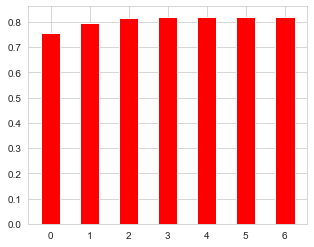


The training accuracies of the Logistic Regression models are as follows:



[0.7562254259501966, 0.7964176496286588, 0.8143294014853648, 0.818698121450415, 0.81826124945391, 0.8200087374399301, 0.8200087374399301]


In [11]:
names = []
for i in range(0,len(scores)):
       names.append(i)
        
plt.bar(names,scores, color ='r', width = 0.5)
plt.show()

print("\nThe training accuracies of the Logistic Regression models are as follows:\n\n\n")
print(scores)

### Select the most promising Logistic Regression model:

In [12]:
#Find the Highest Training Accuracy
maxAcc = np.amax(scores)
print("The  Logistic Regression classifier with the highest Training Accuracy scored", maxAcc)

#Find the classifier with the Highest Training Accuracy
index = np.where(scores == np.amax(scores))
index = (index[0])[0]
print("\n\nThe parameters of the chosen Logistic Regression classifier are as follows:\n", models[index])

The  Logistic Regression classifier with the highest Training Accuracy scored 0.8200087374399301


The parameters of the chosen Logistic Regression classifier are as follows:
 LogisticRegression(C=10, random_state=0)


### Initialize and test the final model with the desired Regularization parameter:

In [13]:
#LogReg is initialized using the chosen parameters
LogReg= (models[index])
prediction=LogReg.predict(X_scaled)

### Obtaining the Confusion Matrix and visualizing it

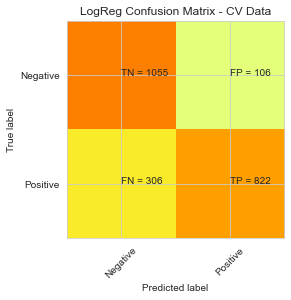

In [14]:
import sklearn.metrics as sklm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sklm.confusion_matrix(y_true=y_arry,y_pred=prediction)


cm = confusion_matrix(y_arry, prediction)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('LogReg Confusion Matrix - CV Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


### Visualising The results

In [15]:
import sklearn.metrics as sklm


def getMetricsSKL(ytrue,ypred):
    acc = 0
    rec = 0
    prec = 0
    f1 = 0
    
    #FILL IN HERE: Set all of the variables above correctly
    acc = sklm.accuracy_score(ytrue, ypred)
    rec = sklm.recall_score(ytrue, ypred)
    prec = sklm.precision_score(ytrue, ypred)
    f1 = sklm.f1_score(ytrue, ypred)
    #STOP FILLING IN HERE
    
    return acc,rec,prec,f1


accskl,recskl,precskl,f1skl = getMetricsSKL(y_arry,prediction)
LogReg_result = [accskl*100,recskl*100,precskl*100,f1skl*100]

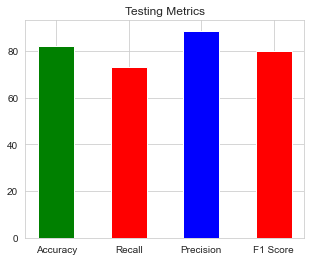


From the graph above we can see that:

 	 	Logistic Regression model has an Accuracy of 82.0%

 	 	Logistic Regression model has an recall of 73.0%

 	 	Logistic Regression model has an Precision  of 89.0%

 	 	Logistic Regression model has an f1-score of 80.0%


In [16]:
titles = "Accuracy","Recall", "Precision", "F1 Score"
temp = [LogReg_result[0],LogReg_result[1],LogReg_result[2],LogReg_result[3]]

plt.title("Testing Metrics")
plt.bar(titles[0], temp[0], color ='g', width = 0.5)
plt.bar(titles[1], temp[1], color ='r', width = 0.5)
plt.bar(titles[2], temp[2], color ='b', width = 0.5)
plt.bar(titles[3], temp[3], color ='r', width = 0.5)

plt.show()

print("\nFrom the graph above we can see that:")
print("\n \t \tLogistic Regression model has an Accuracy of " + str(round(temp[0])) +"%")
print("\n \t \tLogistic Regression model has an recall of " + str(round(temp[1])) +"%")
print("\n \t \tLogistic Regression model has an Precision  of " + str(round(temp[2])) +"%")
print("\n \t \tLogistic Regression model has an f1-score of " + str(round(temp[3])) +"%")


### Save the model:

In [17]:
import pickle

# Save to file in the current working directory
pkl_filename = "model/logreg_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(LogReg, file)


### Biblography:


- "What is Logistic Regression?", _ANAMIKA THANDA_ , 20 APRIL 2020,[Accesssed online 10 June 2020]
https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/



- Albon, Chris. "Tuning Neural Network Hyperparameters", _Chris Albon_ ,20 Dec. 2017, [Accesssed online 12 May 2019]
https://www.chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparamerters/


- Various SKLearn modules were obtained from https://scikit-learn.org